This notebook talks about online retail analysis

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
import datetime as dt

# Data

In [31]:
online_retail_df = pd.read_excel('Data/Online_Retail.xlsx')

online_retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [32]:
online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [33]:
online_retail_df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [34]:
online_retail_df.shape

(541909, 8)

In [35]:
online_retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##  Data cleaning

In [37]:
'Looks like there are lot of recorrds missing with customerID, lets drop those rows'

online_retail_df = online_retail_df[online_retail_df.CustomerID.notna()]

online_retail_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [38]:
online_retail_df.shape

(406829, 8)

## Data wrangling

In [41]:
online_retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
475261,576873,22086,PAPER CHAIN KIT 50'S CHRISTMAS,1,2011-11-16 16:30:00,2.95,17835.0,United Kingdom
533810,581114,21479,WHITE SKULL HOT WATER BOTTLE,2,2011-12-07 12:19:00,4.25,14527.0,United Kingdom
75484,542599,22178,VICTORIAN GLASS HANGING T-LIGHT,12,2011-01-30 11:01:00,1.25,17062.0,United Kingdom
166179,550900,22492,MINI PAINT SET VINTAGE,108,2011-04-21 12:11:00,0.65,16553.0,United Kingdom
216777,555853,22161,HEART DECORATION RUSTIC HANGING,1,2011-06-07 13:44:00,0.19,14375.0,United Kingdom


In [44]:
'''
We might not need date at time level as well as at day level for this analysis, lets get invoice month,
Since invoice year is important, lets get invoiceMonth as 'yyyy-mm-01' (we don't want day)
'''

def getMonth(x):
    return dt.datetime(x.year, x.month, 1)


online_retail_df['invoiceMonth'] = online_retail_df['InvoiceDate'].apply(getMonth)

online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [45]:
'''
    we want to get the customer when they first appeared in the invoiceMonth
'''

online_retail_df['cohort_month'] = online_retail_df.groupby('CustomerID')['invoiceMonth'].transform('min')

online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceMonth,cohort_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01


In [46]:
online_retail_df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceMonth,cohort_month
205072,554705,22568,FELTCRAFT CUSHION OWL,24,2011-05-26 10:12:00,3.39,12910.0,United Kingdom,2011-05-01,2011-04-01
510866,579470,21175,GIN AND TONIC DIET METAL SIGN,5,2011-11-29 15:06:00,2.55,16549.0,United Kingdom,2011-11-01,2011-01-01
94778,544411,21927,BLUE/CREAM STRIPE CUSHION COVER,12,2011-02-18 14:18:00,1.25,13799.0,United Kingdom,2011-02-01,2011-02-01
126884,547103,23181,BULL DOG BOTTLE TOP WALL CLOCK,2,2011-03-21 10:54:00,8.25,15218.0,United Kingdom,2011-03-01,2011-01-01
456999,575728,22138,BAKING SET 9 PIECE RETROSPOT,6,2011-11-10 19:40:00,4.95,14911.0,EIRE,2011-11-01,2010-12-01
290613,562388,22616,PACK OF 12 LONDON TISSUES,12,2011-08-04 15:52:00,0.29,18099.0,United Kingdom,2011-08-01,2011-08-01
74017,542398,21043,APRON MODERN VINTAGE COTTON,3,2011-01-27 15:36:00,5.95,13174.0,United Kingdom,2011-01-01,2010-12-01
483484,577504,84849D,HOT BATHS SOAP HOLDER,2,2011-11-20 12:36:00,1.69,14159.0,United Kingdom,2011-11-01,2010-12-01
273258,560792,47590A,BLUE HAPPY BIRTHDAY BUNTING,3,2011-07-21 10:32:00,5.45,15189.0,United Kingdom,2011-07-01,2011-01-01
314793,564656,20707,CRAZY DAISY HEART DECORATION,12,2011-08-26 14:40:00,1.25,14141.0,United Kingdom,2011-08-01,2011-08-01


In [47]:
'''
    get the difference between our cohort month ans invoice month which gives that for how many months 
    the customer is active from their first order
'''


online_retail_df['cohort_index'] = (
    (online_retail_df.invoiceMonth - online_retail_df.cohort_month) / np.timedelta64(1, 'M'))

online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceMonth,cohort_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,0.0


In [48]:
'''
    lets add extra 1 so, that we can have 1 month as base once they are in
'''

online_retail_df['cohort_index'] = online_retail_df['cohort_index'] + 1

online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceMonth,cohort_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1.0


In [49]:
online_retail_df['cohort_index'] = online_retail_df['cohort_index'].astype(int)

online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceMonth,cohort_month,cohort_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1


In [50]:
online_retail_df.sample(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoiceMonth,cohort_month,cohort_index
349001,567475,84836,ZINC METAL HEART DECORATION,4,2011-09-20 13:11:00,1.25,16360.0,United Kingdom,2011-09-01,2011-09-01,1
400982,571409,85014A,BLACK/BLUE POLKADOT UMBRELLA,3,2011-10-17 12:25:00,5.95,14911.0,EIRE,2011-10-01,2010-12-01,10
410165,572095,20718,RED RETROSPOT SHOPPER BAG,1,2011-10-20 15:15:00,1.25,15511.0,United Kingdom,2011-10-01,2011-09-01,1
186834,552883,23281,FOLDING BUTTERFLY MIRROR RED,96,2011-05-12 10:13:00,0.72,14646.0,Netherlands,2011-05-01,2010-12-01,5
252419,559120,22659,LUNCH BOX I LOVE LONDON,2,2011-07-06 12:18:00,1.95,16393.0,United Kingdom,2011-07-01,2010-12-01,7
530636,580876,22695,WICKER WREATH SMALL,2,2011-12-06 12:12:00,0.59,14071.0,United Kingdom,2011-12-01,2011-03-01,10
159025,550321,85211,S/4 GROOVY CAT MAGNETS,1,2011-04-17 12:49:00,1.65,16770.0,United Kingdom,2011-04-01,2010-12-01,4
359467,568188,48187,DOORMAT NEW ENGLAND,1,2011-09-25 14:33:00,8.25,16049.0,United Kingdom,2011-09-01,2011-09-01,1
2274,536571,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,2,2010-12-01 15:37:00,7.95,14696.0,United Kingdom,2010-12-01,2010-12-01,1
423749,573153,23287,RED VINTAGE SPOT BEAKER,16,2011-10-28 07:39:00,0.85,12678.0,France,2011-10-01,2010-12-01,10


In [51]:
online_retail_df.CustomerID.nunique()

4372

# Analysis

In [53]:
'''
   we want to understand per customer when they got acquired/or first order placed and how long they have been
   continuing
   
   we will groupby cohort_month and cohort_index and count the customeId to see how many customers retained by month
'''

cohort_data_df = online_retail_df.groupby(['cohort_month', \
                                           'cohort_index'])['CustomerID'].agg(pd.Series.nunique).reset_index()
cohort_data_df

,cohort_month,cohort_index,CustomerID
0,2010-12-01,1,948.0
1,2010-12-01,2,362.0
2,2010-12-01,3,482.0
3,2010-12-01,4,341.0
4,2010-12-01,5,376.0
...,...,...,...
75,2011-10-01,1,352.0
76,2011-10-01,2,93.0
77,2011-10-01,3,46.0
78,2011-11-01,1,321.0


In [56]:
cohort_data_df.set_index('cohort_month')

,cohort_index,CustomerID
cohort_month,,
2010-12-01,1,948.0
2010-12-01,2,362.0
2010-12-01,3,482.0
2010-12-01,4,341.0
2010-12-01,5,376.0
...,...,...
2011-10-01,1,352.0
2011-10-01,2,93.0
2011-10-01,3,46.0


In [63]:
cohort_table = cohort_data_df.pivot(index='cohort_month', columns=['cohort_index'], values='CustomerID')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2010-12-01,948.0,362.0,482.0,341.0,376.0,360.0,336.0,336.0,NaN,510.0,NaN,538.0
2011-01-01,421.0,171.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN
2011-04-01,299.0,NaN,111.0,NaN,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN
2011-06-01,235.0,NaN,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_month'>

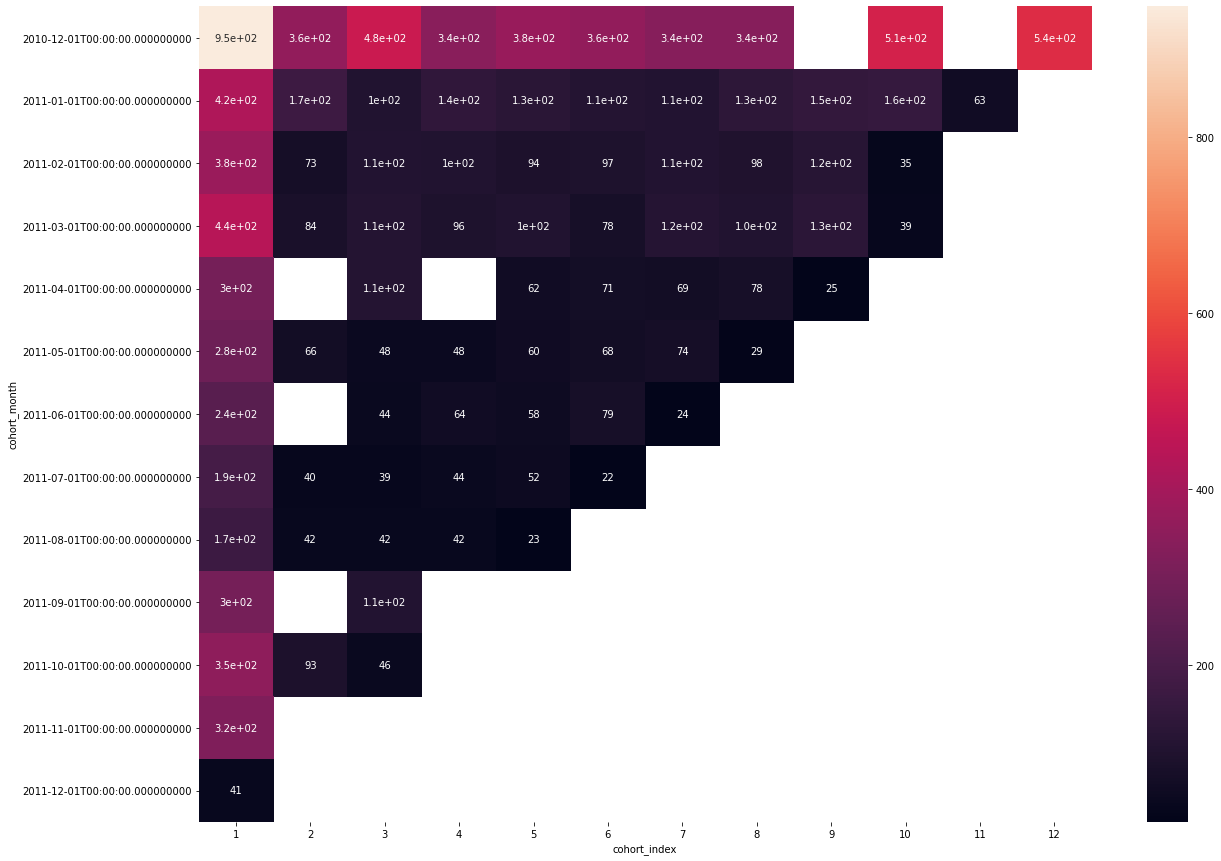

In [64]:
plt.figure(figsize=(20,15))

sns.heatmap(cohort_table, annot=True)


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_month'>

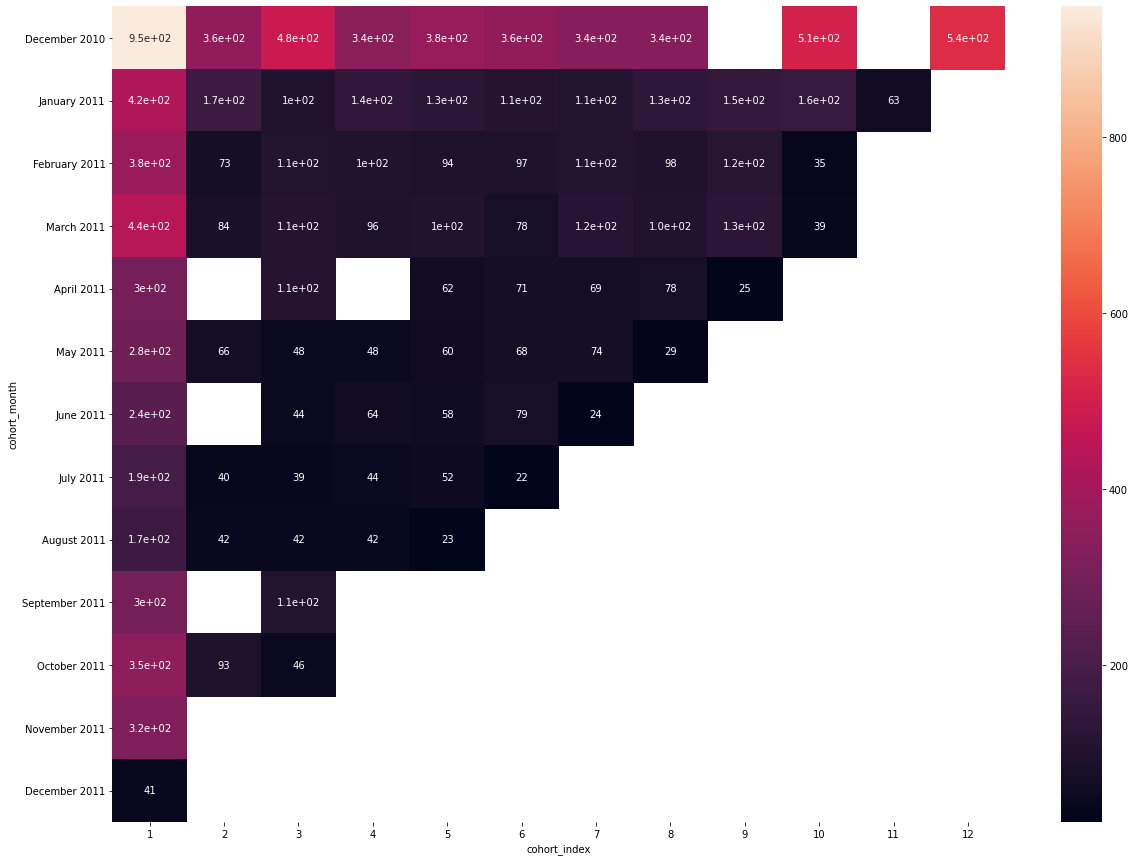

In [65]:
cohort_table.index = cohort_table.index.strftime("%B %Y")

plt.figure(figsize=(20,15))

sns.heatmap(cohort_table, annot=True)


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_month'>

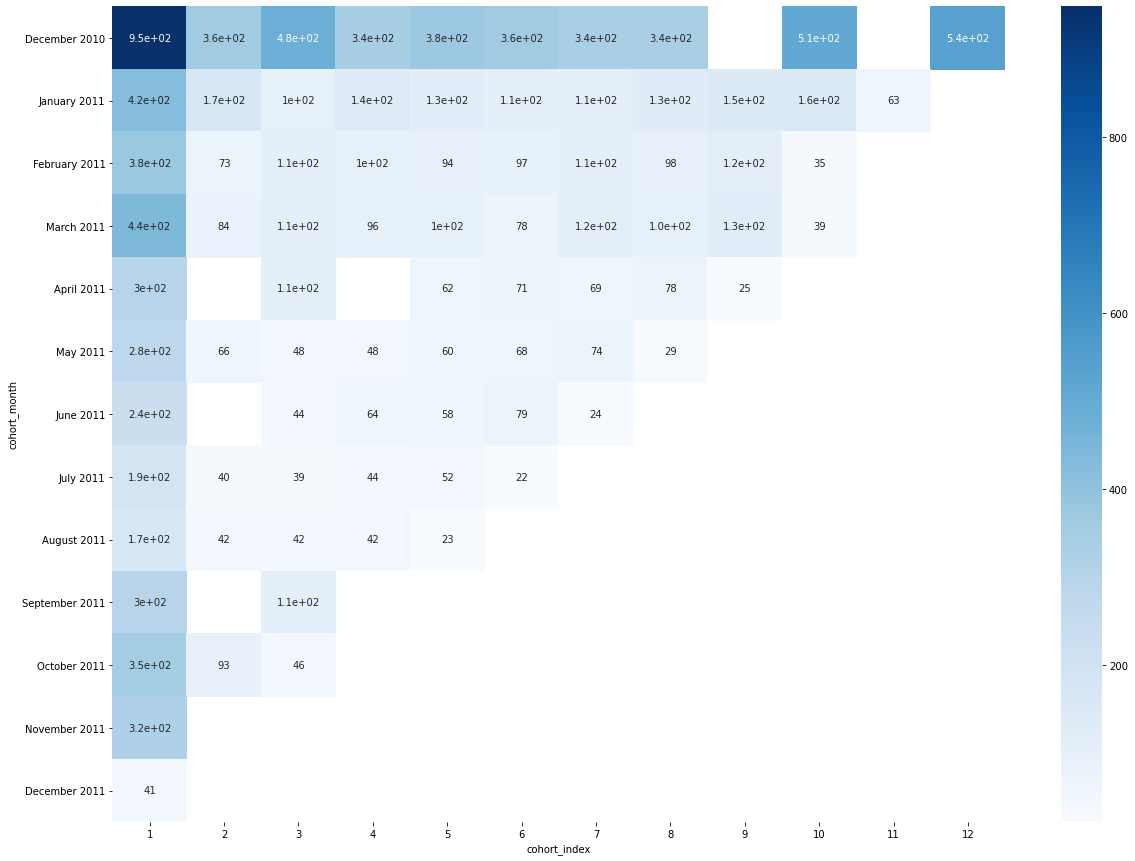

In [68]:
plt.figure(figsize=(20,15))

sns.heatmap(cohort_table, annot=True, cmap='Blues')


In [71]:
# Create  percentages

cohort_new_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)

cohort_new_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
December 2010,1.0,0.381857,0.508439,0.359705,0.396624,0.379747,0.354430,0.354430,NaN,0.537975,NaN,0.567511
January 2011,1.0,0.406176,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN
April 2011,1.0,NaN,0.371237,NaN,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN
June 2011,1.0,NaN,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_month'>

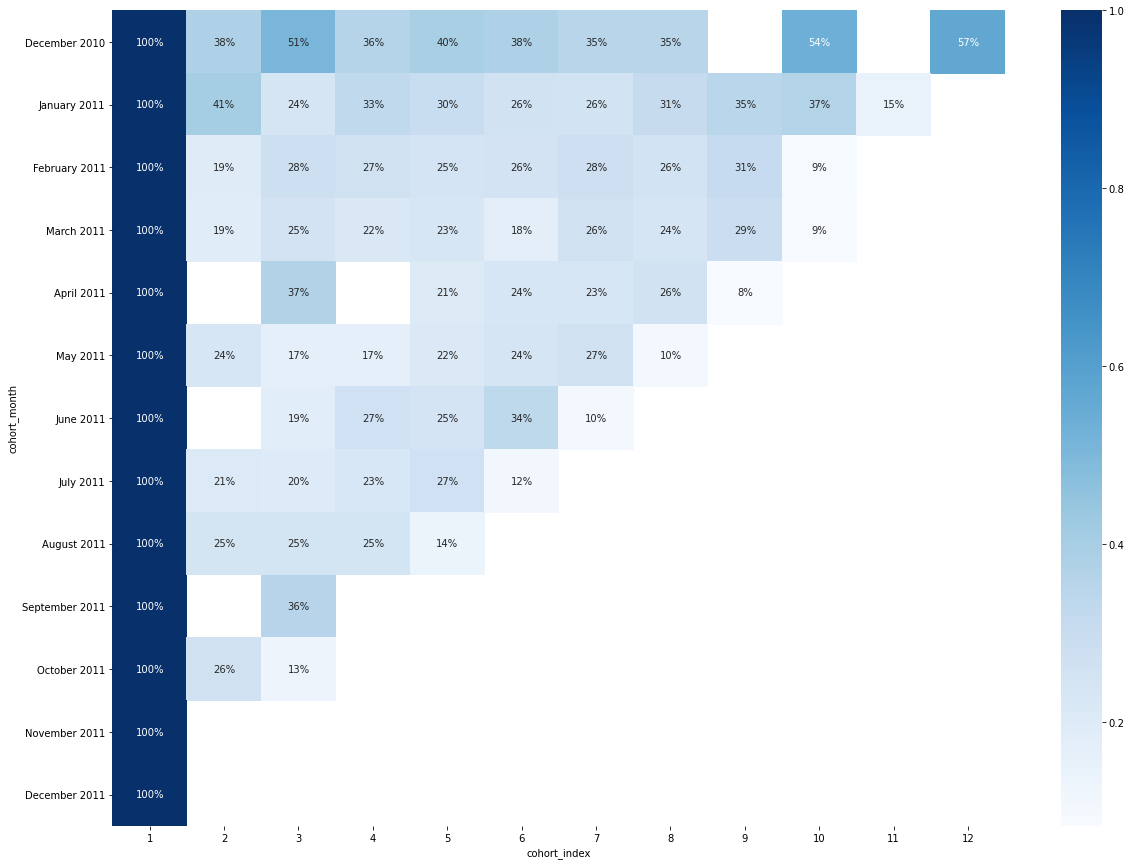

In [74]:
plt.figure(figsize=(20,15))

sns.heatmap(cohort_new_table, annot=True, cmap='Blues', fmt=".0%")
